#Import thư viện

In [1]:
import numpy as np
import pandas as pd
from keras import layers
from sklearn.svm import SVC
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Đọc file csv

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CS114/final_genre.csv")

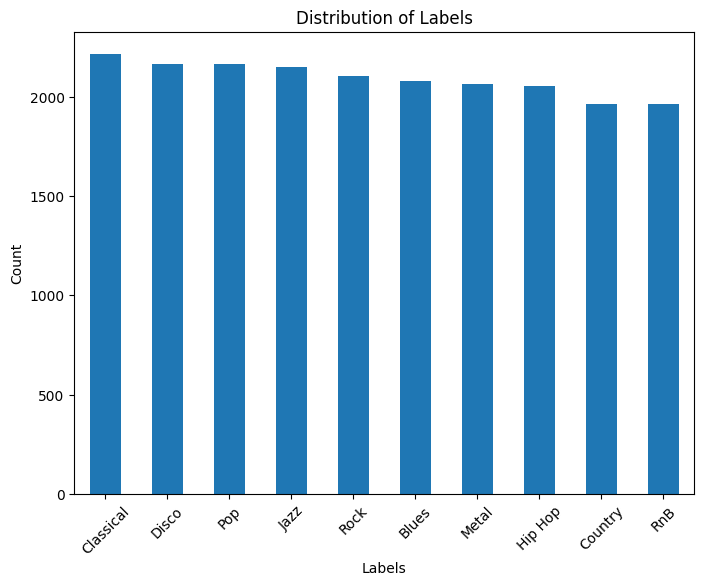

Classical    2215
Disco        2165
Pop          2163
Jazz         2152
Rock         2105
Blues        2081
Metal        2065
Hip Hop      2053
Country      1966
RnB          1963
Name: label, dtype: int64


In [4]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()
# Visualization with a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45)
plt.show()
print(label_counts)

In [5]:
X = df.drop("label", axis = 1)
y = df["label"]

In [6]:
X.shape

(20928, 54)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Sử dụng grid search cho SVM để tìm bộ tham số tối ưu

In [10]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
              'gamma':[0.0001, 0.001, 0.01, 1, 10, 100, 1000]}

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm,
                           param_grid,
                           cv=3,
                           n_jobs=-1)
grid_search.fit(x_train, y_train)
print(
    "Best parameters are {} ".format(
        grid_search.best_params_)

)

Best parameters are {'C': 100, 'gamma': 0.01} 


In [11]:
svm = SVC(kernel='rbf', C = 100, gamma = 0.01)

In [14]:
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [15]:
print(classification_report( y_test, y_pred_svm))

              precision    recall  f1-score   support

       Blues       0.76      0.88      0.82       364
   Classical       0.94      0.98      0.96       483
     Country       0.83      0.80      0.82       390
       Disco       0.94      0.94      0.94       462
     Hip Hop       0.84      0.85      0.85       407
        Jazz       0.89      0.89      0.89       431
       Metal       0.86      0.85      0.86       408
         Pop       0.75      0.73      0.74       454
         RnB       0.82      0.80      0.81       386
        Rock       0.76      0.68      0.72       401

    accuracy                           0.84      4186
   macro avg       0.84      0.84      0.84      4186
weighted avg       0.84      0.84      0.84      4186



In [16]:
y = LabelEncoder().fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Cài đặt DNN

In [17]:
def trainModel(model, epochs, optimizer):
  batch_size = 128
  model.compile(optimizer = optimizer,
                loss = 'sparse_categorical_crossentropy',
                metrics = 'accuracy')

  return model.fit(x_train, y_train,
                   validation_data=(x_test, y_test),
                   epochs= epochs, batch_size = batch_size)

In [18]:
model = Sequential([ layers.Input(shape=(x_train.shape[1],)), layers.Dense(1024, activation='relu'), layers.Dropout(0.2),

layers.Dense(512, activation='relu'),
layers.Dropout(0.2),

layers.Dense(256, activation='relu'),
layers.Dropout(0.2),

layers.Dense(128, activation='relu'),
layers.Dropout(0.2),

layers.Dense(32, activation='relu'),
layers.Dropout(0.2),

layers.Dense(10, activation='softmax'),
])

model_history = trainModel(model = model, epochs = 250, optimizer = 'adam')

Epoch 1/250
131/131 [==============================] - 9s 19ms/step - loss: 1.5866 - accuracy: 0.4463 - val_loss: 1.1676 - val_accuracy: 0.5977
Epoch 2/250
131/131 [==============================] - 1s 7ms/step - loss: 1.2052 - accuracy: 0.5893 - val_loss: 1.0098 - val_accuracy: 0.6476
Epoch 3/250
131/131 [==============================] - 1s 6ms/step - loss: 1.0410 - accuracy: 0.6481 - val_loss: 0.9388 - val_accuracy: 0.6777
Epoch 4/250
131/131 [==============================] - 1s 6ms/step - loss: 0.9217 - accuracy: 0.6855 - val_loss: 0.8349 - val_accuracy: 0.7124
Epoch 5/250
131/131 [==============================] - 1s 4ms/step - loss: 0.8275 - accuracy: 0.7235 - val_loss: 0.7920 - val_accuracy: 0.7344
Epoch 6/250
131/131 [==============================] - 1s 5ms/step - loss: 0.7417 - accuracy: 0.7547 - val_loss: 0.7319 - val_accuracy: 0.7530
Epoch 7/250
131/131 [==============================] - 1s 5ms/step - loss: 0.6707 - accuracy: 0.7757 - val_loss: 0.6911 - val_accuracy: 0.776

In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Accuracy: {test_accuracy}')

131/131 [==============================] - 0s 2ms/step - loss: 0.7282 - accuracy: 0.8908
Test Accuracy: 0.8908265829086304


In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

131/131 [==============================] - 0s 2ms/step


In [21]:
label_mapping = ['Blues', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz', 'Metal', 'Pop', 'RnB', 'Rock']

In [22]:
print(classification_report(y_test, y_pred_classes, target_names=[label_mapping[i] for i in range(10)]))


              precision    recall  f1-score   support

       Blues       0.87      0.89      0.88       364
   Classical       0.95      0.98      0.96       483
     Country       0.87      0.84      0.86       390
       Disco       0.93      0.96      0.94       462
      Hiphop       0.87      0.90      0.89       407
        Jazz       0.95      0.89      0.92       431
       Metal       0.93      0.89      0.91       408
         Pop       0.83      0.82      0.83       454
         RnB       0.84      0.88      0.86       386
        Rock       0.86      0.83      0.85       401

    accuracy                           0.89      4186
   macro avg       0.89      0.89      0.89      4186
weighted avg       0.89      0.89      0.89      4186

